In [22]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
#import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
#import plotly.offline as py#visualization
#py.init_notebook_mode(connected=True)#visualization
#import plotly.graph_objs as go#visualization
#import plotly.tools as tls#visualization
#import plotly.figure_factory as ff#visualization

https://www.kaggle.com/blastchar/telco-customer-churn

In [23]:
telcom = pd.read_csv(r"C:\Personal\Portfolio\telecom\telco-customer-churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")
#first few rows
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
#Overview
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


data manipulation

In [25]:
#replacing spaces with null values in total charges 
#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})
    
#replace values
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

#Separating churn and non churn customers
churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]


feature engineering ( preferably within a sklearn pipeline). Show me your imputation techniques, rare label handling, outlier handling 

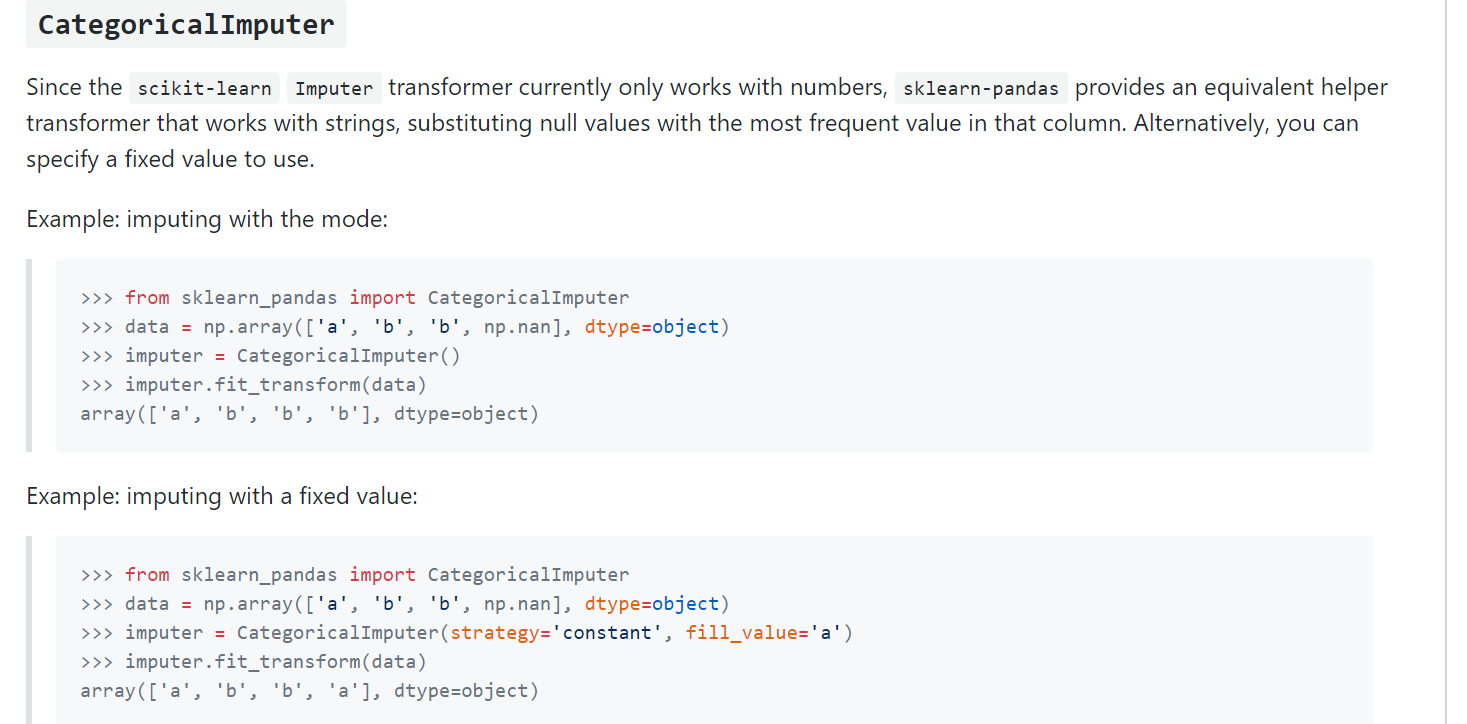

In [26]:
#there is no missing values in this dataset, but so the following script of imputation is just to showcase
#my imputation techniques
#imputation 


#imputation --why i use this?
#https://jamesrledoux.com/code/imputation
categorical_columns = []
numeric_columns = []
for c in telcom.columns:
    if telcom[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)

#create two DataFrames, one for each data type
data_numeric = telcom[numeric_columns]
data_categorical = pd.DataFrame(telcom[categorical_columns])

#here we use mean to impute missing values of numeric variables
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan, strategy='mean', axis=0)
data_numeric = pd.DataFrame(imp.fit_transform(data_numeric), columns = data_numeric.columns) #only apply imputer to numeric columns



#here we use the most frequet to impute the categorical data
data_categorical = data_categorical.apply(lambda 
                                          x: x.fillna(x.value_counts().index[0]))
data_categorical

#Standardize numeric 
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
data_numeric = feature_scaler.fit_transform(data_numeric)
data_numeric=pd.DataFrame(data_numeric)

#join the two masked dataframes back together
telcom = pd.concat([data_numeric, data_categorical], axis = 1)




use algorithms to impute?
https://stats.stackexchange.com/questions/49270/imputation-with-random-forests

Factorize

In [27]:
from sklearn import preprocessing
# Separate input features (X) and target variable (y)
y = telcom.Churn
X = telcom.drop(['Churn','customerID'], axis=1)
    #factorize group label
y=pd.factorize(telcom['Churn'])[0]

#category_col =['open_day','has_theme','haspants','hasbags','hasshoes','hasaccessories','close_day','by_omg','open_time','close_time','fundraising'] 
data_categorical =data_categorical.drop(['Churn','customerID'],axis=1)
labelEncoder = preprocessing.LabelEncoder()

# creating a map of all the numerical values of each categorical labels.
mapping_dict={}
for col in data_categorical:
    X[col] = labelEncoder.fit_transform(X[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
    
print(mapping_dict)



{'gender': {'Female': 0, 'Male': 1}, 'SeniorCitizen': {'No': 0, 'Yes': 1}, 'Partner': {'No': 0, 'Yes': 1}, 'Dependents': {'No': 0, 'Yes': 1}, 'PhoneService': {'No': 0, 'Yes': 1}, 'MultipleLines': {'No': 0, 'No phone service': 1, 'Yes': 2}, 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2}, 'OnlineSecurity': {'No': 0, 'Yes': 1}, 'OnlineBackup': {'No': 0, 'Yes': 1}, 'DeviceProtection': {'No': 0, 'Yes': 1}, 'TechSupport': {'No': 0, 'Yes': 1}, 'StreamingTV': {'No': 0, 'Yes': 1}, 'StreamingMovies': {'No': 0, 'Yes': 1}, 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2}, 'PaperlessBilling': {'No': 0, 'Yes': 1}, 'PaymentMethod': {'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}, 'tenure_group': {'Tenure_0-12': 0, 'Tenure_12-24': 1, 'Tenure_24-48': 2, 'Tenure_48-60': 3, 'Tenure_gt_60': 4}}


In [28]:
#split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

rare label handling

In [29]:
###### 
#rare label handling
#https://elitedatascience.com/imbalanced-classes


#check imbalanced label
print(telcom['Churn'].value_counts())
#no:5163, yes: 1869


#upsample: use sample with replacement on minortity class to create a dataset the same amount as the majority class

#downsample: use sampling without replacement on majority class to create a dara set the same amout as the minority class


#change performace metrics: AU-ROC is recommended: it can tell us how well the algorithm is able to distinguish between two classes
#so an unblanaced class may cause high accuracy but low auroc



#. Penalize Algorithms (Cost-Sensitive Training)
#use penalized learning algorithms that increase the cost of classification mistakes on the minority class.




#tree-based algortihms:perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes.





No     5163
Yes    1869
Name: Churn, dtype: int64


rare label handling-penalized algorithms

#penalized algorithms: one example.
#Penalized-SVM:

from sklearn.svm import SVC

 
# Train model
clf_3 = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
clf_3.fit(X_train, y_train)
 
# Predict on training set
pred_y_3 = clf_3.predict(X_test)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y_test, pred_y_3) )
# 0.688
 
# What about AUROC?
prob_y_3 = clf_3.predict_proba(X_test)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y_test, prob_y_3) )
# 0.5305236678




#outlier handling
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
#1. boxplot
#2. scatterplot
#z-score:Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.
#+3 and -3 z score 

#IQR

#domain knowledge



In [32]:
data_numeric.columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

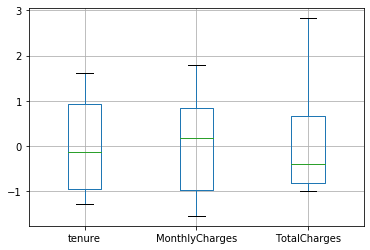

In [33]:
#boxplot

boxplot =data_numeric.boxplot(column=['tenure', 'MonthlyCharges', 'TotalCharges'])

z score

In [34]:
#get z score on numeric columns 
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data_numeric ))
print(z)

threshold = 3
print(np.where(z > 3))

data_numeric_o = data_numeric[(z < 3).all(axis=1)]
data_numeric_o = data_numeric[(z > -3).all(axis=1)]
print(data_numeric.shape)
print(data_numeric_o.shape)

#there are no z score outside 3 or -3 in this dataset

#update telcom dataset
telcom = pd.concat([data_numeric_o, data_categorical], axis = 1)

[[1.28024804 1.16169394 0.99419409]
 [0.06430269 0.26087792 0.17373982]
 [1.23950408 0.36392329 0.95964911]
 ...
 [0.87280842 1.17000405 0.85451414]
 [1.15801615 0.31916782 0.87209546]
 [1.36810945 1.35793167 2.01234407]]
(array([], dtype=int64), array([], dtype=int64))
(7032, 3)
(7032, 3)


feature selection techniques;
Show me you checked your multi colloenarity and only then you moved towards a feature selection techniques like select from model from Sklearn.

In [35]:
#check multi colloenarity 
#https://etav.github.io/python/vif_factor_python.html

#detect colinearity (two variables are correlated)> simply create a correlation matrix
telcom.corr()
#totalcharges and tenure and monthly charges have quite a lot correlation


#to detect multicolinearity (when three or more variables are highly correlated): use VIS(variance inflation factor)
#measure of colinearity among predictor variables within a multiple regression. 
#It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

#if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.



,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


In [36]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
#Step 1: Run a multiple regression
#%%capture
#gather features
data_numeric
y_1=data_numeric['tenure']
X_1=data_numeric[['MonthlyCharges','TotalCharges']]

In [38]:
#Step 2: Calculate VIF Factors
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["features"] = X_1.columns
#Step 3: Inspect VIF Factors
vif.round(1)
#none of the variables vif factors are high
#if there are variables with jhigh vif, we need to discard one of them. 

,VIF Factor,features
0,1.7,MonthlyCharges
1,1.7,TotalCharges


Feature Selection 

In [39]:
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0

#1. features with a high percentage of missing values
#2. Collinear(highly correlated )features)
#3. features with zero importance in a tree-based model
#4. features with low importance
#5. features with a single unique value


#Filter method: use correlation matrix. least accurate
#wrapper method: backward selection, forward selection...
#embedded method: lasso



In [ ]:
telcom

In [ ]:
#backward selection
#put features in a algorithm and deduct feature once (delete feature with the highest p-value
#Adding constant column of ones, mandatory for sm.OLS model

X_1 = sm.add_constant(X_1)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

import statsmodels.api as sm
from statsmodels.api import add_constant
cols = list(X_1.columns)
pmax = 1
while (len(cols)>0):
    p= []
    cols = list(X_1.columns)
    #print(cols)
    X_2 = sm.add_constant(X_1)
    model = sm.OLS(y,X_2).fit()
    p = pd.Series(model.pvalues.values[1:],index=cols) 
    #print(p)
    pmax = max(p)
    pmax
    feature_with_p_max = p.idxmax()
    feature_with_p_max
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

next try: lasso!

model selection and show me exactly why you chose that model. ( I am very interested in that and may ask you how the model works at a mathematical level) 

In [40]:
#model selection -cross validation (random forest and logistic)
#https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/
X_2=X
y_2=y

#random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)


from sklearn.model_selection import cross_val_score
all_accuracies_rf = cross_val_score(estimator=classifier, X=X_2, y=y_2, cv=5)



In [41]:
#logistic
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(random_state=0).fit(X_2,y_2)

all_accuracies_lg = cross_val_score(estimator=lg, X=X_2, y=y_2, cv=5)

In [42]:
#results of cv
print("random forest cv: ",all_accuracies_rf, "mean: ", all_accuracies_rf.mean())


print("logistic cv: ",all_accuracies_lg, "mean: ", all_accuracies_lg.mean())


#logisitc regression has a slightly higher accuracy 

random forest cv:  [0.79317697 0.79317697 0.77754087 0.8029872  0.79501779] mean:  0.7923799605948703
logistic cv:  [0.80312722 0.81236674 0.78535892 0.80440967 0.80498221] mean:  0.8020489515402476


Grid Search 

In [46]:
#grid selection -parameter selection on random forest

grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}






In [48]:
from sklearn.model_selection import GridSearchCV
#the estimator(the algorithmn) used here is the random forest classifier initizlied above

# Now we will create an instance of gridsearchcv class. 

gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)
#the algorithm is going to be executed for 100 times (5*2*2)

gd_sr.fit(X_2, y_2)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootst

In [49]:
#Get the parameters that return the highest accuracy
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 300}


In [50]:
#print the accuracy with the best parameters
best_result = gd_sr.best_score_
print(best_result)

0.7923777019340159


Bonus1: 
show me a set class that you have built in python that can flag its time for retrain the model. Every model has a drift and how you are measuring it. 

Bonus2:
Show me you can do function Transformer in Sklearn. That is when you write your custom function and inherit from sklearn class . Very helpful in real life and saves a lot of time. In last 5 years I have interviewed  more than 100 people none of them has talked about it. 